In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

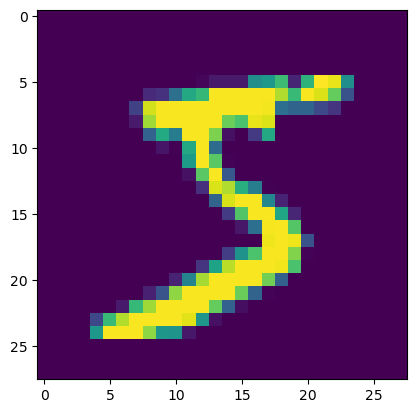

In [12]:
plt.imshow(X_train[0])

#### Before applying neural network for prediction we need to scale the dataset 
#### from dataset we can see min value = 0 and max value = 255

In [16]:
X_train=X_train/255
X_test=X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
model=Sequential()

In [20]:
## Input layer - Flatten layer
model.add(Flatten(input_shape=(28,28)))

In [23]:
## Hidden Layer
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))

In [24]:
## Output Layer
model.add(Dense(10,activation="softmax"))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [30]:
history=model.fit(X_train,Y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8484 - loss: 0.5162 - val_accuracy: 0.9572 - val_loss: 0.1423
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9619 - loss: 0.1271 - val_accuracy: 0.9657 - val_loss: 0.1161
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9753 - loss: 0.0820 - val_accuracy: 0.9702 - val_loss: 0.0990
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9830 - loss: 0.0564 - val_accuracy: 0.9726 - val_loss: 0.0922
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0412 - val_accuracy: 0.9697 - val_loss: 0.1002
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0.9700 - val_loss: 0.0941
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9747 - val_loss: 0.0955
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.022

In [31]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:
Y_pred[0]

array([2.7352906e-13, 1.3979389e-11, 8.0259879e-12, 3.4674309e-07,
       1.5100415e-20, 2.7838743e-11, 4.6549096e-21, 9.9999964e-01,
       5.7790666e-14, 1.3261112e-08], dtype=float32)

In [34]:
Y_pred=Y_pred.argmax(axis=1)

In [35]:
Y_pred[0]

7

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print("Accuracy of model :",accuracy_score(Y_test,Y_pred))

Accuracy of model : 0.9783


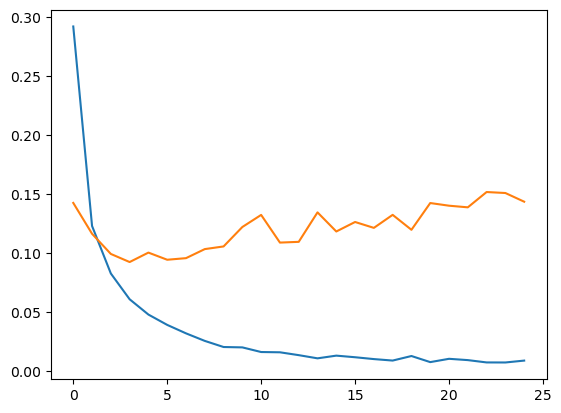

In [38]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

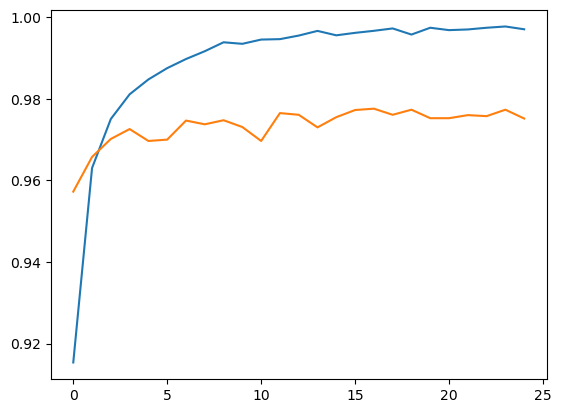

In [39]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

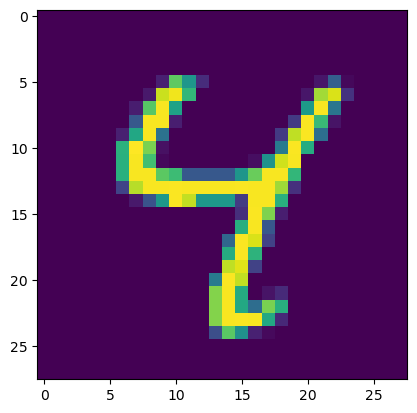

In [42]:
plt.imshow(X_test[6])

In [43]:
print("True value :",Y_test[6])
print("Predicted value :",Y_pred[6])

True value : 4
Predicted value : 4
